In [37]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [38]:

v,i = np.loadtxt('expdata.dat',delimiter=',',unpack=True)

def f(x,a,b):
    return a*x+b

popt, pcov = curve_fit(f,v,i)

xFit = np.arange(4.0,13.0,0.1)

popt

array([0.0212417 , 0.11739287])

<function matplotlib.pyplot.show(close=None, block=None)>

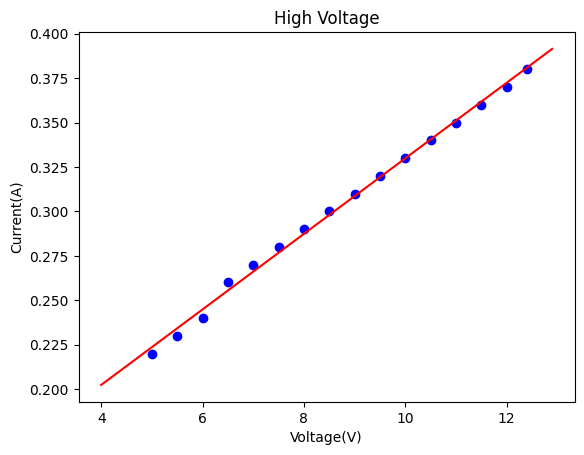

In [39]:
#plot of v vs i graph

plt.plot(v,i,'bo')
plt.plot(xFit,f(xFit,*popt),'r-')
#plt.xticks(np.arange(0,12.5,0.5))
#plt.yticks(np.arange(0,0.75,0.5))
plt.xlabel('Voltage(V)')
plt.ylabel('Current(A)')
plt.title('High Voltage')
plt.show

In [40]:
R = v/i ## resistance
P = v*i ## power

# we know that R = rho.(l/A)
# let k = R/rho

k = 1.7/(5.6*(10**-8))
rho = R/k               #for different values of R

T = []

for i in rho:
    T.append((((i*(1+20*0.0045))/(5.8*10**-8) - 1)/0.0045) + 273) # we want the temperature in kelvin

print(P)
print(T)
print(rho)
print(R)

[1.1   1.265 1.44  1.69  1.89  2.1   2.32  2.55  2.79  3.04  3.3   3.57
 3.85  4.14  4.44  4.712]
[3177.3784703013916, 3340.5054629547976, 3490.0385395537533, 3490.0385395537533, 3617.4185677676783, 3735.7000225377515, 3845.8241355995438, 3948.6066411238835, 4044.7580172595563, 4134.899932386748, 4219.578701142596, 4299.2763658539825, 4374.4198782961475, 4445.388751158192, 4512.521468730394, 4539.918140516946]
[7.48663102e-07 7.87723785e-07 8.23529412e-07 8.23529412e-07
 8.54030501e-07 8.82352941e-07 9.08722110e-07 9.33333333e-07
 9.56356736e-07 9.77941176e-07 9.98217469e-07 1.01730104e-06
 1.03529412e-06 1.05228758e-06 1.06836248e-06 1.07492260e-06]
[22.72727273 23.91304348 25.         25.         25.92592593 26.78571429
 27.5862069  28.33333333 29.03225806 29.6875     30.3030303  30.88235294
 31.42857143 31.94444444 32.43243243 32.63157895]


In [41]:
def f(x,a,b):
    return a+b*np.log(x)

popt, pcov = curve_fit(f,np.log(P),np.log(T))

xFit = np.arange(0.4,1.6,0.1)

popt

array([8.31374775, 0.13792639])

([<matplotlib.axis.YTick at 0x2030738d8d0>,
 [Text(0, 8.0, '8.0'),
  Text(0, 8.1, '8.1'),
  Text(0, 8.2, '8.2'),
  Text(0, 8.299999999999999, '8.3'),
  Text(0, 8.399999999999999, '8.4')])

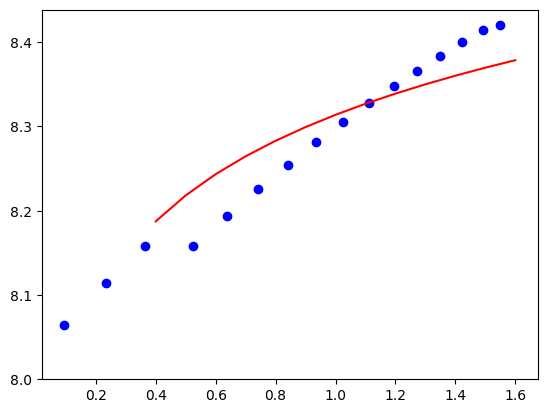

In [42]:
plt.plot(np.log(P),np.log(T),'bo')
plt.plot(xFit,f(xFit,*popt),'r-')
plt.yticks(np.arange(8.0,8.5,0.1))